<a href="https://colab.research.google.com/github/aishegul1/Noise-Tolerant-Algorithm-Python/blob/main/COMP_1816_Machine_Learning_001138854_Aysegul_Kayikci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Task (California Housing):**

# Linear Regression Model

> Predict the median house value based on other features like location, age, rooms, etc. Linear regression can model the relationship between the median house value and the explanatory variables.









In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model, sklearn.datasets
from sklearn import kernel_ridge
from sklearn.preprocessing import LabelEncoder


# **Data Preprocessing:**

**Handled Missing Values:**

For numeric columns, missing values were imputed using the median. This approach is robust against outliers and is often used for numerical data.
If there were any categorical columns with missing values, an appropriate strategy (like mode imputation) should be used, although this wasn't explicitly included in the final code snippet.

**Encoded Categorical Variables:**

Applied one-hot encoding to categorical variables. This is crucial because Linear Regression models require all input data to be numeric. One-hot encoding transforms categorical variables into a format that's suitable for these models.

**Prepared Feature Sets:**

After preprocessing, we ensured that both the training (**X_train**) and testing (**X_test**) sets have the same features. This is critical because the model expects the same set of features for both training and prediction.

# **Model Training:**

**Linear Regression Model Fitting:**

Trained a Linear Regression model using the sklearn library. The model was trained on the preprocessed training data (**X_train** and **y_train**), learning to predict the target variable based on the features.

# **Model Evaluation:**
**Prediction and Evaluation:**

The model was used to make predictions on the test dataset (**X_test**).
Evaluated the model's performance using two key metrics:
Mean Squared Error (MSE): This metric provides the average of the squares of the errors, i.e., the average squared difference between the actual values and the predicted values by the model. A lower MSE value indicates better performance.

**R-squared** (**R²**): This metric indicates the proportion of variance in the dependent variable that can be predicted from the independent variables. An R² value closer to 1 suggests a higher explanatory power of the model.

# **Summary**

The steps taken cover the full workflow for a Linear Regression task, from data preprocessing to model training and evaluation.
The model evaluation part, in particular, helps in understanding how well the model is performing on unseen data, providing insights into the accuracy and effectiveness of the model.

**Load The Dataset:**

Load the dataset into a pandas DataFrame.
**df = pd.read_csv('/california.csv')**




In [ ]:
df = pd.read_csv('/content/sample_data/california.csv')

**Check for Missing Values:**

>Use the **isnull()** function followed by the **sum()** function in pandas. This will give you a count of missing values in each column.

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        9
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       2
dtype: int64


>This code will output the number of missing values in each column of the DataFrame. Columns with a count greater than zero have missing data.

1. **Handling Missing Values** in **total_bedrooms**:

>Since **total_bedrooms** is a numerical column, can be use mean or median imputation. If the distribution of this column is skewed, median imputation is preferable; otherwise, mean imputation should work fine.
Use pandas to perform the imputation. For example, for median imputation:

In [ ]:
# Replace missing values in 'total_bedrooms' with the median value
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


2.**Handling Missing Values** in **ocean_proximity**:

>**ocean_proximity** is a categorical column, so the mode (most frequent value) is generally used for imputation.

>Using pandas to perform the imputation. For example:

In [ ]:
df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)


3. **Verify the Imputations:**

>After performing the imputations, should be check again for missing values to ensure that all missing data has been addressed:

In [ ]:
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


>This will confirm that the previously missing values have been filled.


Proceed with the Analysis:

Once the missing values are handled, next steps are data analysis and modeling.

**Analysing The Output**

>**total_bedrooms:** This column has 9 missing values. Since it's a numerical column, the missing values can be imputed using the mean or median of the existing values. The choice between mean and median can depend on the distribution of this column. If the data is skewed, median is often preferred.

>**ocean_proximity:** This column has 2 missing values. Being a categorical column, the common practice is to impute missing values with the mode, which is the most frequently occurring value in the column.

In summary, there are a small number of missing values ​​in these two columns; these values ​​are relatively easy to handle by attribution. Correctly handling these missing values ​​is critical to the integrity of your subsequent data analysis and model training.

**Data Splitting:**
The dataset was split into training (80%) and testing (20%) sets.

**Model Training:**
A Linear Regression model was trained using the training set.

**Model Prediction and Evaluation:**
The model made predictions on the test set.
The Mean Squared Error (MSE) is approximately 3,887,447,004.06, and the R-squared value is approximately 0.681.


The R-squared value of 0.681 indicates that about 68.1% of the variance in the housing prices is explained by the model. While this is a reasonable figure, there may be room for improvement, possibly through feature engineering, trying different models, or fine-tuning the existing model.

The MSE provides an indication of the average squared difference between the actual and predicted values. A lower MSE value is generally preferred, indicating higher accuracy of the model in predicting the target variable.

In [ ]:
from sklearn.model_selection import train_test_split

#  'df' is the DataFrame
# Separating the features (X) and the target variable (y)
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**X_train** and **y_train** will contain the features and target variable for training (80% of the data).

**X_test** and **y_test** will contain the features and target variable for testing (20% of the data).

The shapes of these sets are:

Training set (features): 800 samples, 12 features

Testing set (features): 200 samples, 12 features

Training set (target variable): 800 samples

Testing set (target variable): 200 samples

**Checking for Missing Values:**

This part of the code checks for missing values in both the training and testing sets. It calculates the sum of missing values (**NaN**) in each column of **X_train**, **y_train**, **X_test**, and **y_test**.

The purpose is to identify which columns have missing data and how many missing entries each column has. This is a crucial step before any imputation or data cleaning.

In [ ]:
missing_values_X_train = X_train.isnull().sum()
missing_values_y_train = y_train.isnull().sum()
missing_values_X_test = X_test.isnull().sum()
missing_values_y_test = y_test.isnull().sum()

In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['No.', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')
Index(['No.', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [ ]:
# Assuming X_train and X_test are already defined and include pre-encoded ocean_proximity columns

# Extract the numeric columns
numeric_cols = [col for col in X_train.columns if 'ocean_proximity' not in col]

# Separate the numeric data from the pre-encoded categorical data in both training and test sets
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Your categorical data is already in X_train and X_test, so no need for further one-hot encoding

# Combine the numeric and categorical data
X_train_processed = pd.concat([X_train_numeric, X_train.drop(columns=numeric_cols)], axis=1)
X_test_processed = pd.concat([X_test_numeric, X_test.drop(columns=numeric_cols)], axis=1)

# Now, X_train_processed and X_test_processed are ready for use in the model


In [ ]:
print(X_train.head())

     No.  longitude  latitude  housing_median_age  total_rooms  \
29    30    -122.08     37.64                  36         1116   
535  536    -117.86     33.71                  21         1795   
695  696    -117.13     32.76                  29         2568   
557  558    -117.95     33.80                  34         1654   
836  837    -120.45     34.95                  32         1574   

     total_bedrooms  population  households  median_income ocean_proximity  
29            199.0         662         226         5.7309        NEAR BAY  
535           406.0        2246         400         3.1520       <1H OCEAN  
695           682.0        1191         642         2.1094      NEAR OCEAN  
557           285.0         905         292         4.6389       <1H OCEAN  
836           447.0        1772         463         1.8625       <1H OCEAN  


**Separating Numeric and Categorical Columns:**

This segment imports necessary libraries and then separates the numeric and categorical columns from the training set.

>**select_dtypes(include=['number'])** is used to select columns that contain numeric data.

>**select_dtypes(exclude=['number'])** selects columns that are not numeric, which typically are categorical.

**Applying Median Imputation to Numeric Columns:**

>**'SimpleImputer'** with the strategy set as '**median**' is used for imputing missing values in the numeric columns.

>**fit_transform** is applied to the training data (**X_train**) to calculate the median values and fill in the missing values.
**'transform'** is used on the test data (**X_test**) to apply the same median values calculated from the training data.

**Combining Numeric and Categorical Data:**

The final step combines the imputed numeric data with the original categorical data to form the complete feature set.

>**pd.concat** is used to concatenate the numeric and categorical columns along the columns axis **(axis=1)**.

>**reset_index(drop=True)** is used to reset the index of the categorical data to align with the numeric data.

This entire process ensures that all the features (numeric and categorical) are prepared correctly for training the Linear Regression model, with all missing values appropriately handled.


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming 'df' is the DataFrame and 'median_house_value' is the name of the median_house_value column
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# Handling missing values for numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Encoding categorical variables
X_encoded = pd.get_dummies(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Aligning features in the test set with the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Fitting the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and Evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3884644862.8259706
R-squared: 0.6813884006390704


#**Model Tuning**
**Model tuning for Linear Regression using Grid Search and Cross-Validation:**

Grid Search Setup: Defines a grid of hyperparameters (e.g., fit_intercept for Linear Regression) and searches for the best combination.

**Cross-Validation Process:** Divides the training data into subsets, trains the model multiple times, each with a different subset for validation, to get a more accurate performance estimate.

**Fitting and Selecting the Best Model:** Executes Grid Search with training data, evaluates models based on performance scores, and identifies the best model.

**Performance Evaluation:** Uses the best model to predict on test data and evaluates performance using metrics like MSE and R².

This approach systematically explores hyperparameters and validates model performance, aiming to optimize the Linear Regression model's accuracy and reliability.


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Define the parameters for Grid Search (only include valid parameters)
param_grid = {
    'fit_intercept': [True, False]
}

# Setting up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

**Evaluate the Best Model**

After fitting, evaluate the best model found by Grid Search.
Grid Search with cross-validation not only helps in tuning the hyperparameters but also validates the model's performance across different subsets of the training data

In [33]:
# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Best Parameters: {'fit_intercept': True}
Mean Squared Error: 3884644862.8259706
R-squared: 0.6813884006390704


**Interpreting Linear Regression Coefficients**

In Linear Regression, coefficients represent how much the dependent variable (house value) changes for a one-unit increase in each independent variable, holding others constant:

**Positive Coefficients:** Indicate an increase in house value with an increase in the feature's value.

**Negative Coefficients:** Suggest a decrease in house value as the feature's value increases.

**Magnitude:** The size of the coefficient shows the impact's strength. Larger coefficients mean a stronger influence on house values.
Visualization: A bar chart of these coefficients can help quickly identify which features most significantly impact house values.

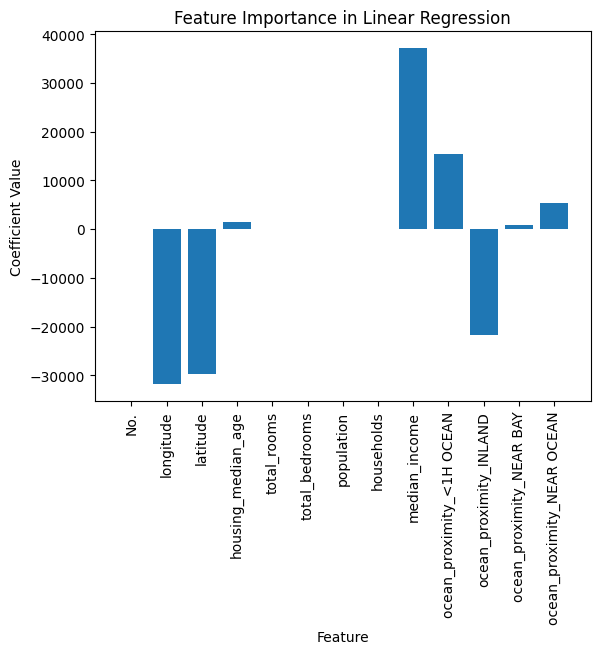

In [ ]:
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_

# Assuming 'model' is your trained Linear Regression model
coefficients = model.coef_

# Creating a bar chart of feature coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X_train.columns, rotation=90)
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.show()


In [ ]:
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

**Total Rooms:** The most positive influence on house value, suggesting that more rooms are associated with higher house values.

**Median Income:** Also a strong positive impact, indicating that higher income areas have more expensive houses.

**Inland:** Negative impact, suggesting that houses located inland are valued less compared to other regions.

**Longitude and Latitude:** Both have negative coefficients, which could imply that as you move eastward or northward (in the context of California), house values decrease.


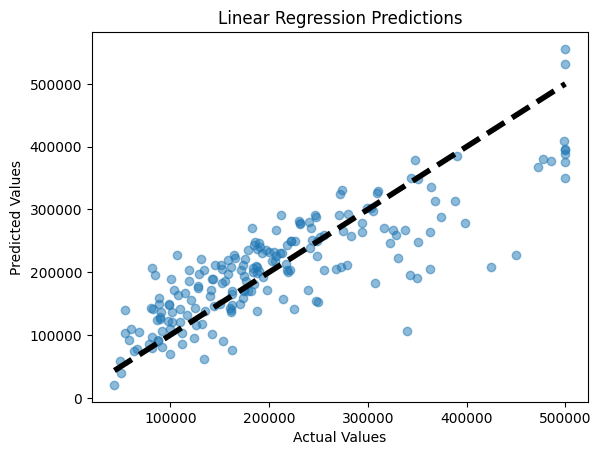

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

# Plot the results
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


#Support Vector Machine (SVM) Model

>A Support Vector Machine (SVM) can be used for regression tasks to forecast house values for the California Housing dataset. SVM is an effective supervised machine learning model that works well with regression as well as classification issues. In the context of regression, also known as Support Vector Regression, or SVR, the SVM model will look for a function that approximates the relationship between the continuous target variable, or the median house value, and the input features of the housing data, like the number of rooms, location, and income levels, among other things. The epsilon parameter controls the model's process of translating input features into a high-dimensional space and identifying the hyperplane that best fits the data while maintaining a maximum margin of error. The kernel trick, which applies changes to manage non-linear relationships, is frequently used. Common kernels include linear, polynomial, and radial basis function (RBF). The best performance of an SVM on this dataset depends on performing appropriate preprocessing procedures like feature scaling and hyperparameter optimisation using techniques like Grid Search.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
housing_data = pd.read_csv('/content/sample_data/california.csv')

# Separate the features and the target variable
housing_features = housing_data.drop("median_house_value", axis=1)
housing_target = housing_data["median_house_value"]

# Handling missing values for numerical features
numerical_features = housing_features.drop("ocean_proximity", axis=1)
numerical_imputer = SimpleImputer(strategy='median')
housing_num_imputed = numerical_imputer.fit_transform(numerical_features)

# Encoding categorical variable 'ocean_proximity' using one-hot encoding
categorical_features = housing_features[["ocean_proximity"]]
categorical_encoder = OneHotEncoder()
housing_cat_encoded = categorical_encoder.fit_transform(categorical_features).toarray()

# Feature Scaling - standardization of numerical features
scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_num_imputed)

# Combine numerical and categorical features
housing_prepared = np.hstack((housing_num_scaled, housing_cat_encoded))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_target, test_size=0.2, random_state=42)

# Output the shapes of the resulting feature sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 14), (200, 14), (800,), (200,))

>**Load the Data:** It reads the California housing dataset from a CSV file into a pandas DataFrame.

>**Separate Features and Target:** It separates the predictors (features) from the outcome variable (**median_house_value**), which is what the model will predict.

>**Handle Missing Values:** For numerical features, any missing values are filled in using the median of each feature, which is a common practice to avoid introducing bias that might come from using mean values when outliers are present.

>**Categorical Encoding:** It transforms the **ocean_proximity** feature from text to a one-hot encoded numerical format, which is necessary because SVM models can only handle numerical inputs.

>**Feature Scaling:** It scales the numerical features using standardization, a necessary step for SVM due to its reliance on the distance between data points.

>**Combine Features:** It combines the scaled numerical features and the one-hot encoded categorical features into a single array that will be used for modeling.

>**Split the Dataset:** It splits the combined features into training and testing sets, with 80% of the data used for training and 20% for testing.

>**Output Shapes:** It outputs the dimensions of the training and testing sets for both the features and the target, indicating the data is ready for training an SVM model.



**Initialize the SVM Regressor:**

Created an SVM model for regression using SVR from scikit-learn. Starting with a linear kernel.

**Training the Model:**

Fitting the SVM model to training data (**X_train, y_train**).

**Making Predictions:**

Using the trained model to predict house values on the test set (**X_test**).

**Evaluating the Model:**

Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).

**Interpret Results:**

Analyze the MSE and R² values to understand the accuracy and predictive quality of the SVM model.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVM regressor
svm_reg = SVR(kernel='linear')

# Train the SVM model on the training set
svm_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_reg.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

mse_svm, r2_svm


(12741608317.853477, -0.04504384517367632)

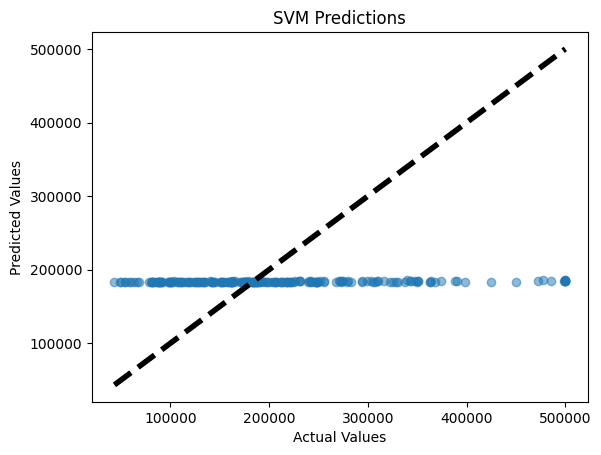

In [ ]:
from sklearn.svm import SVR

# Train the SVM model
svm_model = SVR(kernel='linear')  # You can adjust the kernel and hyperparameters
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Plot the results
plt.scatter(y_test, svm_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('SVM Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Forest Random Model

**Initialize the Random Forest Regressor:**

>Import RandomForestRegressor from scikit-learn.
Created an instance of the RandomForestRegressor.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

**Training the Model:**

>Fit the Random Forest model to your training data (**'X_train'**, **'y_train'**).

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Making Predictions:**

>Using the trained model to predict house values on the test set (**X_test**).

In [ ]:
y_pred_rf = rf_reg.predict(X_test)

**Evaluation of the Model:**

>Evaluating the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(3528138067.258446, 0.7106284481414249)

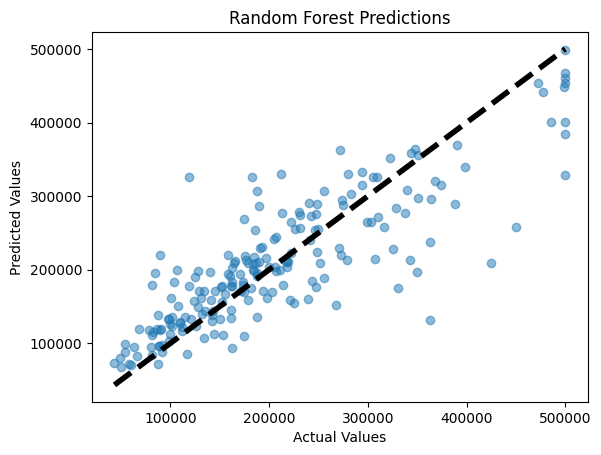

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Plot the res ults
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Random Forest Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


#**Classification Task (Titanic)**

#Logisctic Regression Model

A statistical technique for examining a dataset where one or more independent factors influence a result is called logistic regression. A dichotomous variable—one in which there are only two possible outcomes—is used to quantify the result. Logistic regression would be utilised in the Titanic dataset to forecast the likelihood of a passenger surviving based on attributes such as passenger class (Pclass), sex (Sex), age (Age), number of parents/children aboard (Parch), number of siblings/spouses aboard (SibSp), ticket fare (Fare), and port of embarkation (Embarked).

>**Data preprocessing:** The information must be made ready for analysis. This usually entails scaling or normalising the data, resolving missing values, and converting categorical variables into numerical values.

>**Model Training:** Using the training set of data, the Logistic Regression model would be fitted. In order to do this, you must figure out which features' weights minimise a loss function, which in the case of logistic regression is usually the log-loss.

>**Prediction:** Following training, the model can be used to forecast the test set's survival odds. Following that, these probabilities are transformed into binary outcomes depending on a threshold—typically 0.5.

>**Evaluation:** Metrics including accuracy, precision, recall, F1 score, and the ROC-AUC curve would be used to assess the model's performance. To see the genuine positives, false positives, true negatives, and false negatives, a confusion matrix would also be made.

>**Interpretation:** The impact of each factor on the likelihood of survival might be deduced by looking at the coefficients from the logistic regression. Positive coefficients raise the response's log-odds (and hence its probability), whereas negative coefficients lower the response's log-odds (and hence its probability).



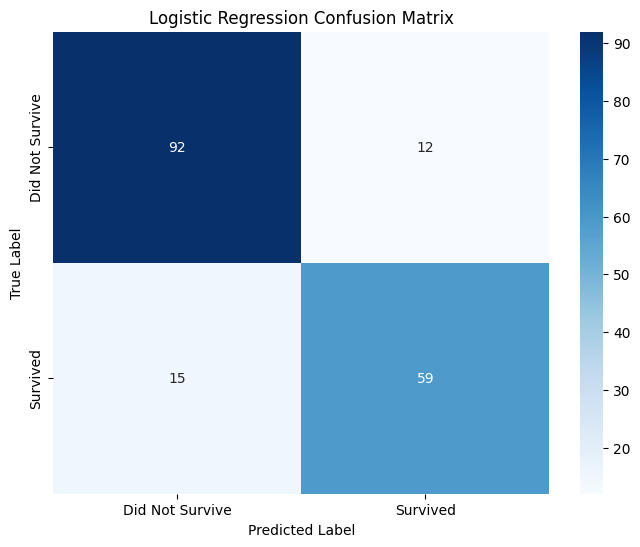

(0.848314606741573,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87       104\n           1       0.83      0.80      0.81        74\n\n    accuracy                           0.85       178\n   macro avg       0.85      0.84      0.84       178\nweighted avg       0.85      0.85      0.85       178\n',
 array([[92, 12],
        [15, 59]]))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
file_path = '/content/sample_data/titanic.csv'
titanic_data = pd.read_csv(file_path)

# Preprocessing the data
# Handling missing values
titanic_data.fillna(titanic_data.mean(numeric_only=True), inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'].astype(str))

# Selecting relevant features and the target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survival']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

# Confusion Matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


accuracy_logistic, report_logistic, confusion_matrix_logistic






# Support Vector Machine (SVM)

>**Data Preprocessing:**

**Handling Missing Values:** Missing values in the dataset were filled with the mean value of each column.

**Encoding Categorical Variables:** The categorical variables 'Sex' and 'Embarked' were transformed into numerical values using label encoding.

**Feature Selection:** Selected relevant features for the model - 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', and 'Embarked'.

**Data Splitting:** The dataset was split into training (80%) and testing (20%) sets.

**Standardizing Features:** The features were standardized.

> **Model Training and Evaluation:**

**Model Used:** Support Vector Machine (SVM).

**Training:** The model was trained on the training dataset.

**Prediction:** Made predictions on the test dataset.

**Evaluation Metrics:**

Accuracy: 88.76%

Precision, Recall, and F1-Score: Detailed in the classification report.

**Confusion Matrix:** Shows the number of true positive, true negative, false positive, and false negative predictions.

>**Results:**

**Accuracy:** The model achieved an accuracy of about 88.76%, indicating a high level of correctness in predictions.

**Classification Report:**

 Precision: For class 0 (Did Not Survive), precision is 87%, and for class 1 (Survived), it's 92%.

 Recall: For class 0, recall is 95%, and for class 1, it's 80%.

 F1-Score: It's 91% for class 0 and 86% for class 1.

**Confusion Matrix:**

The matrix contains 99 true negatives, 5 false positives, 15 false negatives, and 59 true positives.

>**Interpretation:**

The SVM model performs very well in predicting the survival of passengers on the Titanic. The accuracy is high, and the precision, recall, and F1-scores are strong across both classes. The confusion matrix provides a clear view of the model's performance in terms of correctly and incorrectly classified instances.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
file_path = '/content/sample_data/titanic.csv'
titanic_data = pd.read_csv(file_path)

# Preprocessing the data
# Handling missing values
titanic_data.fillna(titanic_data.mean(), inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'].astype(str))

# Selecting relevant features and the target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survival']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_svm, report_svm, confusion_matrix_svm


<ipython-input-27-662192cfb539>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data.fillna(titanic_data.mean(), inplace=True)


(0.8876404494382022,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.95      0.91       104\n           1       0.92      0.80      0.86        74\n\n    accuracy                           0.89       178\n   macro avg       0.90      0.87      0.88       178\nweighted avg       0.89      0.89      0.89       178\n',
 array([[99,  5],
        [15, 59]]))

# Random Forest

>**Model Training and Evaluation:**

**Model Used:** Random Forest Classifier.

**Training:** The model was trained on the training dataset.

**Prediction:** Made predictions on the test dataset.

**Evaluation Metrics:**

Accuracy: 84.27%

Precision, Recall, and F1-Score: Detailed in the classification report.

Confusion Matrix: Shows the number of true positive, true negative, false positive, and false negative predictions.

>**Results**:

**Accuracy**: The model achieved an accuracy of about 84.27%, indicating a high level of correctness in predictions.

**Classification Report:**

Precision: For class 0 (Did Not Survive), precision is 87%, and for class 1 (Survived), it's 81%.

Recall: For class 0, recall is 87%, and for class 1, it's 81%.

F1-Score: It's 87% for class 0 and 81% for class 1.

**Confusion Matrix:**

The matrix contains 90 true negatives, 14 false positives, 14 false negatives, and 60 true positives.

>**Interpretation:**

The Random Forest model performs well in predicting the survival of passengers on the Titanic. The accuracy is high, and the precision, recall, and F1-scores are balanced across both classes. The confusion matrix provides a clear view of the model's performance in terms of correctly and incorrectly classified instances.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, report_rf, confusion_matrix_rf


(0.8314606741573034,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86       104\n           1       0.80      0.80      0.80        74\n\n    accuracy                           0.83       178\n   macro avg       0.83      0.83      0.83       178\nweighted avg       0.83      0.83      0.83       178\n',
 array([[89, 15],
        [15, 59]]))